In [9]:

import pandas as pd
import numpy as np

data =  pd.read_csv('./aave_barrow_contract.csv')



df = data.copy()

df.head(3)

,Txhash,Blockno,UnixTimestamp,DateTime,From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $1869.43/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Method
0,0xa23b260fa3ec2677889587a5bc72e843ae6f39e5adf1...,22104765,1662458272,06/09/2022 09:57,0x4365f8e70cf38c6ca67de41448508f2da8825500,NaN,0x76d3030728e52deb8848d5613abade88441cbc59,0.0,0,0.0,0.000730,1.364804,1558.9,0x60c06040
1,0x64b50ed929f06e574dc0dbfbaae11905e171878b15af...,22154621,1662483310,06/09/2022 16:55,0xd53c79ff8c473bbfe4e40e5525d4d24fd4b8534c,0x76d3030728e52deb8848d5613abade88441cbc59,NaN,0.0,0,0.0,0.000097,0.180834,1558.9,Withdraw ETH
2,0x650a432506ecd60e6b968469f9e09f9d35826e33015d...,22154653,1662483341,06/09/2022 16:55,0xd53c79ff8c473bbfe4e40e5525d4d24fd4b8534c,0x76d3030728e52deb8848d5613abade88441cbc59,NaN,0.0,0,0.0,0.000103,0.192614,1558.9,Withdraw ETH


In [10]:
import pandas as pd


deposit_value_intervals = [0, 1, 10, 100, 1000, 10000]
deposit_value_scores = [10, 25, 40, 55, 70, 100]

deposit_time_intervals = [0, 30, 90, 180, 365]
deposit_time_scores = [10, 30, 50, 70, 100]

borrow_value_intervals = [0, 1, 10, 100, 1000, 10000]
borrow_value_scores = [10, 25, 40, 55, 70, 100]

borrow_time_intervals = [0, 30, 90, 180, 365]
borrow_time_scores = [10, 30, 50, 70, 100]

repayment_value_intervals = [0, 1, 10, 100, 1000, 10000]
repayment_value_scores = [10, 25, 40, 55, 70, 100]

deposit_df = pd.DataFrame(columns=['Address', 'Value_IN(ETH)', 'Deposit Value Score'])
deposit_time_df = pd.DataFrame(columns=['Address', 'DateTime', 'Deposit Time Score'])
borrow_df = pd.DataFrame(columns=['Address', 'Value_OUT(ETH)', 'Borrow Value Score'])
borrow_time_df = pd.DataFrame(columns=['Address', 'DateTime', 'Borrow Time Score'])
repayment_df = pd.DataFrame(columns=['Address', 'Value_IN(ETH)', 'Repayment Value Score'])

for address, group_data in df.groupby('From'):
    methods = group_data['Method'].unique()
    for method in methods:
        if 'Deposit ETH' in method:
            value_in_eth = group_data['Value_IN(ETH)'].sum()
            deposit_value_score = None
            deposit_time_score = None

           
            if 0 <= value_in_eth < 1:
                deposit_value_score = 10
            elif 1 <= value_in_eth < 10:
                deposit_value_score = 25
            elif 10 <= value_in_eth < 100:
                deposit_value_score = 40
            elif 100 <= value_in_eth < 1000:
                deposit_value_score = 55
            elif 1000 <= value_in_eth < 10000:
                deposit_value_score = 70
            else:
                deposit_value_score = 100

            deposit_df = pd.concat([deposit_df, pd.DataFrame({'Address': [address], 'Value_IN(ETH)': [value_in_eth], 'Deposit Value Score': [deposit_value_score]})], ignore_index=True)

        
            days_since_deposit = (pd.Timestamp.now() - pd.to_datetime(group_data['DateTime'])).dt.days
            if days_since_deposit.iloc[0] <= 30:
                deposit_time_score = 10
            elif days_since_deposit.iloc[0] <= 90:
                deposit_time_score = 30
            elif days_since_deposit.iloc[0] <= 180:
                deposit_time_score = 50
            elif days_since_deposit.iloc[0] <= 365:
                deposit_time_score = 70
            else:
                deposit_time_score = 100

            deposit_time_df = pd.concat([deposit_time_df, pd.DataFrame({'Address': [address], 'DateTime': [group_data['DateTime'].iloc[0]], 'Deposit Time Score': [deposit_time_score]})], ignore_index=True)

        elif 'Borrow ETH' in method:
            value_out_eth = group_data['Value_OUT(ETH)'].sum()
            borrow_value_score = None
            borrow_time_score = None

         
            if 0 <= value_out_eth < 1:
                borrow_value_score = 10
            elif 1 <= value_out_eth < 10:
                borrow_value_score = 25
            elif 10 <= value_out_eth < 100:
                borrow_value_score = 40
            elif 100 <= value_out_eth < 1000:
                borrow_value_score = 55
            elif 1000 <= value_out_eth < 10000:
                borrow_value_score = 70
            else:
                borrow_value_score = 100

            borrow_df = pd.concat([borrow_df, pd.DataFrame({'Address': [address], 'Value_OUT(ETH)': [value_out_eth], 'Borrow Value Score': [borrow_value_score]})], ignore_index=True)

        
            days_since_borrow = (pd.Timestamp.now() - pd.to_datetime(group_data['DateTime'])).dt.days
            if days_since_borrow.iloc[0] <= 30:
                borrow_time_score = 10
            elif days_since_borrow.iloc[0] <= 90:
                borrow_time_score = 30
            elif days_since_borrow.iloc[0] <= 180:
                borrow_time_score = 50
            elif days_since_borrow.iloc[0] <= 365:
                borrow_time_score = 70
            else:
                borrow_time_score = 100

            borrow_time_df = pd.concat([borrow_time_df, pd.DataFrame({'Address': [address], 'DateTime': [group_data['DateTime'].iloc[0]], 'Borrow Time Score': [borrow_time_score]})], ignore_index=True)

        elif 'Repay ETH' in method:
            value_in_eth = group_data['Value_IN(ETH)'].sum()
            repayment_value_score = None

         
            if 0 <= value_in_eth < 1:
                repayment_value_score = 10
            elif 1 <= value_in_eth < 10:
                repayment_value_score = 25
            elif 10 <= value_in_eth < 100:
                repayment_value_score = 40
            elif 100 <= value_in_eth < 1000:
                repayment_value_score = 55
            elif 1000 <= value_in_eth < 10000:
                repayment_value_score = 70
            else:
                repayment_value_score = 100

            repayment_df = pd.concat([repayment_df, pd.DataFrame({'Address': [address], 'Value_IN(ETH)': [value_in_eth], 'Repayment Value Score': [repayment_value_score]})], ignore_index=True)


lp_scores_df = pd.merge(deposit_df, deposit_time_df, on='Address', how='outer')
lp_scores_df = pd.merge(lp_scores_df, borrow_df, on='Address', how='outer')
lp_scores_df = pd.merge(lp_scores_df, borrow_time_df, on='Address', how='outer')
lp_scores_df = pd.merge(lp_scores_df, repayment_df, on='Address', how='outer')


lp_scores_df['LP Score'] = lp_scores_df[['Deposit Value Score', 'Deposit Time Score', 'Borrow Value Score', 'Borrow Time Score', 'Repayment Value Score']].sum(axis=1)


lp_scores_df['LP Reward'] = (lp_scores_df['LP Score'] / 500) * 100


print("Merged Dataframe:")
print(lp_scores_df)


Merged Dataframe:
                                         Address  Value_IN(ETH)_x  \
0     0x0000000a5d2afc64886a80780bc5ca6ecc519181         0.000005   
1     0x0000000f3a9e446d0a6f976df5f0ed1b324dcd0e         0.000005   
2     0x00002b503a75998c97508916a74fdb41934fa030        64.800000   
3     0x0000ce08fa224696a819877070bf378e8b131acf         0.001000   
4     0x0026c9a5bfbee977ad03dcb4a95cfa715278e779         0.012160   
...                                          ...              ...   
1983  0xf576dae6f10ea36a4dfade275aa576560e3b4b4a              NaN   
1984  0xfbd08fd2b2c7148b4e38624158c3155b5b49f886              NaN   
1985  0xfc1d987a42a0e37bd19ae7bc8d7c0566b8555d9c              NaN   
1986  0xfd8a8ff896ccd28efe1c4a3ef69b9c4fd3f1943d              NaN   
1987  0xffc57ab280cb8d1e47e11ce225f113612cff3d8e              NaN   

     Deposit Value Score        DateTime_x Deposit Time Score Value_OUT(ETH)  \
0                     10  09/09/2022 03:35                 70            

In [11]:
lp_scores_df.columns

Index(['Address', 'Value_IN(ETH)_x', 'Deposit Value Score', 'DateTime_x',
       'Deposit Time Score', 'Value_OUT(ETH)', 'Borrow Value Score',
       'DateTime_y', 'Borrow Time Score', 'Value_IN(ETH)_y',
       'Repayment Value Score', 'LP Score', 'LP Reward'],
      dtype='object')

In [12]:

for index, row in lp_scores_df.iterrows():
    value_x = row['Value_IN(ETH)_x']
    value_y = row['Value_IN(ETH)_y']
    if value_x == 0:
        lp_scores_df.at[index, 'Value_IN(ETH)_x'] = value_y

lp_scores_df.drop(columns=['Value_IN(ETH)_y'], inplace=True)


In [13]:
lp_scores_df.head()

,Address,Value_IN(ETH)_x,Deposit Value Score,DateTime_x,Deposit Time Score,Value_OUT(ETH),Borrow Value Score,DateTime_y,Borrow Time Score,Repayment Value Score,LP Score,LP Reward
0,0x0000000a5d2afc64886a80780bc5ca6ecc519181,0.000005,10,09/09/2022 03:35,70,NaN,NaN,NaN,NaN,NaN,80.0,16.0
1,0x0000000f3a9e446d0a6f976df5f0ed1b324dcd0e,0.000005,10,09/09/2022 03:35,70,NaN,NaN,NaN,NaN,NaN,80.0,16.0
2,0x00002b503a75998c97508916a74fdb41934fa030,64.800000,40,15/09/2022 08:20,70,NaN,NaN,NaN,NaN,NaN,110.0,22.0
3,0x0000ce08fa224696a819877070bf378e8b131acf,0.001000,10,11/09/2022 15:06,70,NaN,NaN,NaN,NaN,NaN,80.0,16.0
4,0x0026c9a5bfbee977ad03dcb4a95cfa715278e779,0.012160,10,11/09/2022 11:40,70,NaN,NaN,NaN,NaN,NaN,80.0,16.0


In [14]:

lp_scores_df.drop(columns={'DateTime_x','DateTime_y', }, axis=1, inplace= True)


In [15]:

lp_scores_df.fillna(0, inplace=True)
lp_scores_df.rename(columns={'Value_IN(ETH)_x': 'Value_IN(ETH)'}, inplace=True)

In [16]:
lp_scores_df.sort_values(by='Value_IN(ETH)',ascending=False)

,Address,Value_IN(ETH),Deposit Value Score,Deposit Time Score,Value_OUT(ETH),Borrow Value Score,Borrow Time Score,Repayment Value Score,LP Score,LP Reward
1406,0xc948eb5205bde3e18cac4969d6ad3a56ba7b2347,10000.000000,100,100,0,0,0,0,200.0,40.0
401,0x360537542135943e8fc1562199aea6d0017f104b,6805.001707,70,70,0,10,70,70,290.0,58.0
1147,0xa3fdc58439b4677a11b9b0c49cae0fca9c23ab8a,5734.400000,70,70,0,10,70,70,290.0,58.0
1224,0xaf8f0b2b7dee0dc067d88e1a1c8e284be87871fb,2104.578892,70,100,0,0,0,70,240.0,48.0
865,0x7836deaf4230d329f08fe76387b1b22c2bac0729,828.000000,55,70,0,0,0,0,125.0,25.0
...,...,...,...,...,...,...,...,...,...,...
1870,0xacc2c59c954048fe4fc8d9f1c5dcc8b93afe53bf,0.000000,0,0,0,10,70,10,90.0,18.0
1871,0xb28cfe82641446a4d80ca3610e1e062c9fdc9d77,0.000000,0,0,0,10,70,0,80.0,16.0
1872,0xba5e2a0a6e1426d3ed5b5dd182edc746f72b255f,0.000000,0,0,0,10,100,10,120.0,24.0
1873,0xbabf7f2b252b6d46dd45fd989f874504f35b681c,0.000000,0,0,0,10,70,10,90.0,18.0


In [17]:
lp_scores_df['Value_OUT(ETH)'].value_counts()

0    1988
Name: Value_OUT(ETH), dtype: int64

In [18]:
lp_scores_df['Deposit Value Score'].value_counts()

10     1359
25      266
0       178
40      139
55       42
70        3
100       1
Name: Deposit Value Score, dtype: int64

In [19]:

lp_scores_df.columns

Index(['Address', 'Value_IN(ETH)', 'Deposit Value Score', 'Deposit Time Score',
       'Value_OUT(ETH)', 'Borrow Value Score', 'Borrow Time Score',
       'Repayment Value Score', 'LP Score', 'LP Reward'],
      dtype='object')


# BASIC ANALYSIS

In [20]:
#Average LP reward
average_lp_reward = lp_scores_df['LP Reward'].mean()
print(f"Average LP Reward: {average_lp_reward}")


Average LP Reward: 18.835513078470825


In [21]:
#Total deposit value

total_deposit_value = lp_scores_df['Value_IN(ETH)_x'].sum()
print(f"Total Deposit Value: {total_deposit_value}")


KeyError: 'Value_IN(ETH)_x'

In [ ]:
#Max LP score

max_lp_score = lp_scores_df['LP Score'].max()
print(f"Maximum LP Score: {max_lp_score}")


Maximum LP Score: 320.0


In [ ]:
#Number of wallet addresses

address_count = lp_scores_df['Address'].nunique()
print(f"Number of Unique Addresses: {address_count}")


Number of Unique Addresses: 1988


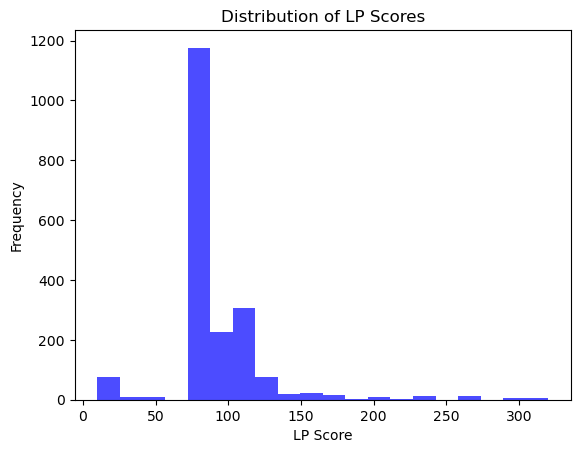

In [ ]:
#LP Scores Distribution

import matplotlib.pyplot as plt

plt.hist(lp_scores_df['LP Score'], bins=20, color='blue', alpha=0.7)
plt.xlabel('LP Score')
plt.ylabel('Frequency')
plt.title('Distribution of LP Scores')
plt.show()


In [ ]:
#Regression: LP Score as a Function of Deposit Value Score

import statsmodels.api as sm

X = sm.add_constant(lp_scores_df['Deposit Value Score'])
y = lp_scores_df['LP Score']
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               LP Score   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     1074.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          9.83e-189
Time:                        13:47:45   Log-Likelihood:                -9402.8
No. Observations:                1988   AIC:                         1.881e+04
Df Residuals:                    1986   BIC:                         1.882e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  66.6726    

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(lp_scores_df['Deposit Value Score'], lp_scores_df['Repayment Value Score'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Statistic: {chi2_stat}, p-value: {p_val}")


Chi-square Statistic: 3016.321379481825, p-value: 0.0


In [ ]:
#Top 10 Addresses by LP Score:

top_10_addresses = lp_scores_df.nlargest(10, 'LP Score')
print(top_10_addresses[['Address', 'LP Score']])


                                         Address  LP Score
811   0x6e2e4991ebc00841e10419065c966b613bc4a84b     320.0
981   0x8a70b9fefd03d8c54877bc26203a87f253266fc8     320.0
1031  0x933258bddd49beeca77f6d1889633c5429af45ea     320.0
1072  0x999fba1f1b5dd5d081ea0ace1b86a814e05d1f92     320.0
1669  0xed51d70c30acbab4ca261057c4dd94f8942127de     320.0
300   0x256843ddd1345bbf2943ab33b11ccf68d80f769e     290.0
401   0x360537542135943e8fc1562199aea6d0017f104b     290.0
424   0x38c5e0f95b08b663602ec23223e7c0695d30410e     290.0
1112  0x9e5a57470a2a136a3d4de39e1996e05944c4b1fb     290.0
1147  0xa3fdc58439b4677a11b9b0c49cae0fca9c23ab8a     290.0


In [ ]:
deposit_count = len(df[df['Method'].str.contains('Deposit ETH', case=False)])
repayment_count = len(df[df['Method'].str.contains('Repay ETH', case=False)])
borrow_count = len(df[df['Method'].str.contains('Borrow ETH', case=False)])
total_transactions = len(df)

borrow_proportion = borrow_count / total_transactions
repayment_proportion = repayment_count / total_transactions
deposit_proportion = deposit_count / total_transactions

print(f"Deposit Proportion: {deposit_proportion}, Borrow Proportion: {borrow_proportion}, Repayment Proportion: {repayment_proportion}")


Deposit Proportion: 0.5494197679071628, Borrow Proportion: 0.07242897158863545, Repayment Proportion: 0.09003601440576231


In [ ]:
import plotly.express as px

# Create a histogram to visualize the distribution of Borrow Value Score and Repayment Value Score
fig = px.histogram(lp_scores_df, x=['Borrow Value Score', 'Repayment Value Score'], nbins=20,
                   labels={'value': 'Score', 'variable': 'Score Type'},
                   title='Distribution of Borrow Value Score and Repayment Value Score')

fig.show()


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# Melt the DataFrame to transform the columns into a single 'Score' column
melted_lp_new = lp_scores_df.melt(id_vars=['LP Reward'], value_vars=['Deposit Value Score', 'Deposit Time Score', 'Borrow Value Score', 'Borrow Time Score', 'Repayment Value Score'],
                           var_name='Score', value_name='Value')

# Create a violin plot to visualize the distribution of LP reward for each score
fig = px.violin(melted_lp_new, x='Score', y='LP Reward', box=True, points='all', title='Distribution of LP Reward for Each Score Category',
             labels={'LP Reward': 'LP Reward', 'Score': 'Score Category'})

# Show the plot
fig.show()


In [ ]:
lp_scores_df.to_csv('./LP reward.csv')

In [22]:

import pandas as pd

# Define value and time intervals along with corresponding scores as tuples
value_intervals = [(0, 1), (1, 10), (10, 100), (100, 1000), (1000, 10000), (10000, float('inf'))]
value_scores = [10, 25, 40, 55, 70, 100]

time_intervals = [(0, 30), (30, 90), (90, 180), (180, 365), (365, float('inf'))]
time_scores = [10, 30, 50, 70, 100]

# Create a function to calculate the score based on intervals and scores
def calculate_score(value, intervals, scores):
    for index, (start, end) in enumerate(intervals):
        if start <= value < end:
            return scores[index]
    return scores[-1]

# Assuming 'df' contains the original data as a DataFrame
# Create empty lists to store results
deposit_df, deposit_time_df, borrow_df, borrow_time_df, repayment_df = [], [], [], [], []

for address, group_data in df.groupby('From'):
    methods = group_data['Method'].unique()
    for method in methods:
        if 'Deposit ETH' in method:
            value_in_eth = group_data['Value_IN(ETH)'].sum()
            deposit_value_score = calculate_score(value_in_eth, value_intervals, value_scores)

            deposit_df.append({'Address': address, 'Value_IN(ETH)': value_in_eth, 'Deposit Value Score': deposit_value_score})

            days_since_deposit = (pd.Timestamp.now() - pd.to_datetime(group_data['DateTime'])).dt.days
            deposit_time_score = calculate_score(days_since_deposit.iloc[0], time_intervals, time_scores)

            deposit_time_df.append({'Address': address, 'DateTime': group_data['DateTime'].iloc[0], 'Deposit Time Score': deposit_time_score})

        elif 'Borrow ETH' in method:
            value_out_eth = group_data['Value_OUT(ETH)'].sum()
            borrow_value_score = calculate_score(value_out_eth, value_intervals, value_scores)

            borrow_df.append({'Address': address, 'Value_OUT(ETH)': value_out_eth, 'Borrow Value Score': borrow_value_score})

            days_since_borrow = (pd.Timestamp.now() - pd.to_datetime(group_data['DateTime'])).dt.days
            borrow_time_score = calculate_score(days_since_borrow.iloc[0], time_intervals, time_scores)

            borrow_time_df.append({'Address': address, 'DateTime': group_data['DateTime'].iloc[0], 'Borrow Time Score': borrow_time_score})

        elif 'Repay ETH' in method:
            value_in_eth = group_data['Value_IN(ETH)'].sum()
            repayment_value_score = calculate_score(value_in_eth, value_intervals, value_scores)

            repayment_df.append({'Address': address, 'Value_IN(ETH)': value_in_eth, 'Repayment Value Score': repayment_value_score})

# Create DataFrames from the lists of dictionaries
deposit_df = pd.DataFrame(deposit_df)
deposit_time_df = pd.DataFrame(deposit_time_df)
borrow_df = pd.DataFrame(borrow_df)
borrow_time_df = pd.DataFrame(borrow_time_df)
repayment_df = pd.DataFrame(repayment_df)


# Merge DataFrames to get the final LP scores DataFrame
lp_scores_df2 = pd.merge(deposit_df, deposit_time_df, on='Address', how='outer')
lp_scores_df2 = pd.merge(lp_scores_df2, borrow_df, on='Address', how='outer')
lp_scores_df2 = pd.merge(lp_scores_df2, borrow_time_df, on='Address', how='outer')
lp_scores_df2 = pd.merge(lp_scores_df2, repayment_df, on='Address', how='outer')

# Calculate LP Score and LP Reward
lp_scores_df2['LP Score'] = lp_scores_df2[['Deposit Value Score', 'Deposit Time Score', 'Borrow Value Score', 'Borrow Time Score', 'Repayment Value Score']].sum(axis=1)
lp_scores_df2['LP Reward'] = (lp_scores_df2['LP Score'] / 500) * 100

print("Merged DataFrame:")
print(lp_scores_df2)
lp_scores_df2 = lp_scores_df2.fillna(0)

lp_scores_df2.head(3)

Merged DataFrame:
                                         Address  Value_IN(ETH)_x  \
0     0x0000000a5d2afc64886a80780bc5ca6ecc519181         0.000005   
1     0x0000000f3a9e446d0a6f976df5f0ed1b324dcd0e         0.000005   
2     0x00002b503a75998c97508916a74fdb41934fa030        64.800000   
3     0x0000ce08fa224696a819877070bf378e8b131acf         0.001000   
4     0x0026c9a5bfbee977ad03dcb4a95cfa715278e779         0.012160   
...                                          ...              ...   
1983  0xf576dae6f10ea36a4dfade275aa576560e3b4b4a              NaN   
1984  0xfbd08fd2b2c7148b4e38624158c3155b5b49f886              NaN   
1985  0xfc1d987a42a0e37bd19ae7bc8d7c0566b8555d9c              NaN   
1986  0xfd8a8ff896ccd28efe1c4a3ef69b9c4fd3f1943d              NaN   
1987  0xffc57ab280cb8d1e47e11ce225f113612cff3d8e              NaN   

      Deposit Value Score        DateTime_x  Deposit Time Score  \
0                    10.0  09/09/2022 03:35                70.0   
1                  

,Address,Value_IN(ETH)_x,Deposit Value Score,DateTime_x,Deposit Time Score,Value_OUT(ETH),Borrow Value Score,DateTime_y,Borrow Time Score,Value_IN(ETH)_y,Repayment Value Score,LP Score,LP Reward
0,0x0000000a5d2afc64886a80780bc5ca6ecc519181,0.000005,10.0,09/09/2022 03:35,70.0,0.0,0.0,0,0.0,0.0,0.0,80.0,16.0
1,0x0000000f3a9e446d0a6f976df5f0ed1b324dcd0e,0.000005,10.0,09/09/2022 03:35,70.0,0.0,0.0,0,0.0,0.0,0.0,80.0,16.0
2,0x00002b503a75998c97508916a74fdb41934fa030,64.800000,40.0,15/09/2022 08:20,70.0,0.0,0.0,0,0.0,0.0,0.0,110.0,22.0


In [23]:
borrow_df.head()

,Address,Value_OUT(ETH),Borrow Value Score
0,0x0025500c6a6bcaebde159db6a307f4d38503a079,0,10
1,0x0043b8708867866434a9d4032e85e2eead3e1bba,0,10
2,0x032e9ea7e5ca19937c06cfa101b5bb1b55150910,0,10
3,0x0351b0b81fdd1db5dad0617d97c598cd3c37baaf,0,10
4,0x04f2c60d181d3255968a86a0fc76c524265e200c,0,10


In [24]:
lp_scores_df2[lp_scores_df2['Address']=='0x0000000a5d2afc64886a80780bc5ca6ecc519181']

,Address,Value_IN(ETH)_x,Deposit Value Score,DateTime_x,Deposit Time Score,Value_OUT(ETH),Borrow Value Score,DateTime_y,Borrow Time Score,Value_IN(ETH)_y,Repayment Value Score,LP Score,LP Reward
0,0x0000000a5d2afc64886a80780bc5ca6ecc519181,0.000005,10.0,09/09/2022 03:35,70.0,0.0,0.0,0,0.0,0.0,0.0,80.0,16.0


In [25]:

dd = pd.read_csv('./newLPdata.csv')

dd.head()

,Unnamed: 0,Address,Value_IN(ETH)_x,Deposit Value Score,Deposit Time Score,Value_OUT(ETH),Borrow Value Score,Borrow Time Score,Repayment Value Score,LP Score,LP Reward
0,0,0x0000000a5d2afc64886a80780bc5ca6ecc519181,0.000005,10,70,0,0,0,0,80.0,16.0
1,1,0x0000000f3a9e446d0a6f976df5f0ed1b324dcd0e,0.000005,10,70,0,0,0,0,80.0,16.0
2,2,0x00002b503a75998c97508916a74fdb41934fa030,64.800000,40,70,0,0,0,0,110.0,22.0
3,3,0x0000ce08fa224696a819877070bf378e8b131acf,0.001000,10,70,0,0,0,0,80.0,16.0
4,4,0x0026c9a5bfbee977ad03dcb4a95cfa715278e779,0.012160,10,70,0,0,0,0,80.0,16.0


In [26]:

import pandas as pd

In [27]:
df = pd.read_csv('/Users/aoamacsplace/Documents/mosaic/Aave/token/data_copy.csv')

In [28]:
import pandas as pd

# Define the new intervals and scores for 'Borrow NA'
deposit_na_intervals = [(0, 1), (1, 2), (2, 3), (3, 10), (10, float('inf'))]
deposit_na_scores = [10, 30, 50, 70, 100]

# Create a function to calculate the score based on intervals and scores
def calculate_score(value, intervals, scores):
    for index, (start, end) in enumerate(intervals):
        if start <= value < end:
            return scores[index]
    return scores[-1]

# Assuming 'df' contains the original data as a DataFrame
# Create an empty list to store results
deposit_na_data = []

for address, group_data in df.groupby('From'):
    methods = group_data['Method'].unique()
    for method in methods:
        if 'depositETH' in method:
            # Count the number of different tokens Deposited (using unique token names)
            deposit_na_count = group_data['token_name'].nunique()
            deposit_na_score = calculate_score(deposit_na_count, deposit_na_intervals, deposit_na_scores)

            deposit_na_data.append({'Address': address, 'Deposit Token Score': deposit_na_score})

# Create a DataFrame from the list of dictionaries
deposit_na_df = pd.DataFrame(deposit_na_data)

print("Deposit NA DataFrame:")
deposit_na_df.head()

Deposit NA DataFrame:


,Address,Deposit Token Score
0,0x00000001b01122945d67cf7c972f1a2063ca4008,50
1,0x00000009d94baf057697d988d2e3eec2fce81162,50
2,0x0000000a5d2afc64886a80780bc5ca6ecc519181,50
3,0x0000000f3a9e446d0a6f976df5f0ed1b324dcd0e,50
4,0x00000015e180b01c40b881e10774bc784bb6f4eb,30


In [29]:

deposit_na_df.head()

,Address,Deposit Token Score
0,0x00000001b01122945d67cf7c972f1a2063ca4008,50
1,0x00000009d94baf057697d988d2e3eec2fce81162,50
2,0x0000000a5d2afc64886a80780bc5ca6ecc519181,50
3,0x0000000f3a9e446d0a6f976df5f0ed1b324dcd0e,50
4,0x00000015e180b01c40b881e10774bc784bb6f4eb,30


In [30]:
# Define the new intervals and scores for 'Borrow NA'
borrow_na_intervals = [(0, 1), (1, 2), (2, 3), (3, 10), (10, float('inf'))]
borrow_na_scores = [10, 30, 50, 70, 100]

# Create a function to calculate the score based on intervals and scores
def calculate_score(value, intervals, scores):
    for index, (start, end) in enumerate(intervals):
        if start <= value < end:
            return scores[index]
    return scores[-1]

# Assuming 'df' contains the original data as a DataFrame
# Create an empty list to store results
borrow_na_data = []

for address, group_data in df.groupby('From'):
    methods = group_data['Method'].unique()
    for method in methods:
        if 'borrowETH' in method:
            # Count the number of different tokens Borrowed (using unique token names)
            borrow_na_count = group_data['token_name'].nunique()
            borrow_na_score = calculate_score(borrow_na_count, borrow_na_intervals, borrow_na_scores)

            borrow_na_data.append({'Address': address, 'Borrow Token Score': borrow_na_score})

# Create a DataFrame from the list of dictionaries
borrow_na_df = pd.DataFrame(borrow_na_data)

print("Borrow NA DataFrame:")
borrow_na_df.head()

Borrow NA DataFrame:


,Address,Borrow Token Score
0,0x0000000000000000000000000000000000000000,30


In [31]:
# Define the new intervals and scores for 'repay NA'
repay_na_intervals = [(0, 1), (1, 2), (2, 3), (3, 10), (10, float('inf'))]
repay_na_scores = [10, 30, 50, 70, 100]

# Create a function to calculate the score based on intervals and scores
def calculate_score(value, intervals, scores):
    for index, (start, end) in enumerate(intervals):
        if start <= value < end:
            return scores[index]
    return scores[-1]

# Assuming 'df' contains the original data as a DataFrame
# Create an empty list to store results
repay_na_data = []

for address, group_data in df.groupby('From'):
    methods = group_data['Method'].unique()
    for method in methods:
        if 'repayETH' in method:
            # Count the number of different tokens repayed (using unique token names)
            repay_na_count = group_data['token_name'].nunique()
            repay_na_score = calculate_score(repay_na_count, repay_na_intervals, repay_na_scores)

            repay_na_data.append({'Address': address, 'repay Token Score': repay_na_score})

# Create a DataFrame from the list of dictionaries
repay_na_df = pd.DataFrame(repay_na_data)

print("repay NA DataFrame:")
repay_na_df.head()

repay NA DataFrame:


,Address,repay Token Score
0,0x001b1e09360cdcc6ed239bea65ad038b19b5a4cc,30
1,0x0025500c6a6bcaebde159db6a307f4d38503a079,70
2,0x00267406807adc99d0654f6c809cb04b84a93f60,30
3,0x002841301d1ab971d8acb3509aa2891e3ef9d7e1,50
4,0x0043b8708867866434a9d4032e85e2eead3e1bba,70


In [33]:
# Merge LP scores DataFrame with other DataFrames on 'Address'
merged_df = lp_scores_df.merge(borrow_na_df, on='Address', how='left')
merged_df = merged_df.merge(repay_na_df, on='Address', how='left')
merged_df = merged_df.merge(deposit_na_df, on='Address', how='left')

# Fill NaN values with 0
merged_df = merged_df.fillna(0)

print("Merged DataFrame:")
merged_df.head()


Merged DataFrame:


,Address,Value_IN(ETH),Deposit Value Score,Deposit Time Score,Value_OUT(ETH),Borrow Value Score,Borrow Time Score,Repayment Value Score,LP Score,LP Reward,Borrow Token Score,repay Token Score,Deposit Token Score
0,0x0000000a5d2afc64886a80780bc5ca6ecc519181,0.000005,10,70,0,0,0,0,80.0,16.0,0.0,0.0,50.0
1,0x0000000f3a9e446d0a6f976df5f0ed1b324dcd0e,0.000005,10,70,0,0,0,0,80.0,16.0,0.0,0.0,50.0
2,0x00002b503a75998c97508916a74fdb41934fa030,64.800000,40,70,0,0,0,0,110.0,22.0,0.0,0.0,30.0
3,0x0000ce08fa224696a819877070bf378e8b131acf,0.001000,10,70,0,0,0,0,80.0,16.0,0.0,0.0,70.0
4,0x0026c9a5bfbee977ad03dcb4a95cfa715278e779,0.012160,10,70,0,0,0,0,80.0,16.0,0.0,0.0,50.0


In [38]:
# Drop the specified columns
columns_to_drop = ['LP Score', 'LP Reward', 'Value_OUT(ETH)']
merged_df = merged_df.drop(columns=columns_to_drop)

# Rename 'Value_IN(ETH)' column to 'Value(ETH)'
merged_df = merged_df.rename(columns={'Value_IN(ETH)': 'Value(ETH)'})

print("Modified DataFrame:")



KeyError: "['LP Score', 'LP Reward', 'Value_OUT(ETH)'] not found in axis"

In [39]:
merged_df.head()

,Address,Value(ETH),Deposit Value Score,Deposit Time Score,Borrow Value Score,Borrow Time Score,Repayment Value Score,Borrow Token Score,repay Token Score,Deposit Token Score
0,0x0000000a5d2afc64886a80780bc5ca6ecc519181,0.000005,10,70,0,0,0,0.0,0.0,50.0
1,0x0000000f3a9e446d0a6f976df5f0ed1b324dcd0e,0.000005,10,70,0,0,0,0.0,0.0,50.0
2,0x00002b503a75998c97508916a74fdb41934fa030,64.800000,40,70,0,0,0,0.0,0.0,30.0
3,0x0000ce08fa224696a819877070bf378e8b131acf,0.001000,10,70,0,0,0,0.0,0.0,70.0
4,0x0026c9a5bfbee977ad03dcb4a95cfa715278e779,0.012160,10,70,0,0,0,0.0,0.0,50.0


In [40]:
merged_df['LP Score'] = merged_df.loc[:, 'Deposit Value Score':'Deposit Token Score'].sum(axis=1)



In [43]:
merged_df['LP Reward'] = (merged_df['LP Score'] / 800) * 100

In [44]:

merged_df.head()

,Address,Value(ETH),Deposit Value Score,Deposit Time Score,Borrow Value Score,Borrow Time Score,Repayment Value Score,Borrow Token Score,repay Token Score,Deposit Token Score,LP Score,LP Reward
0,0x0000000a5d2afc64886a80780bc5ca6ecc519181,0.000005,10,70,0,0,0,0.0,0.0,50.0,130.0,16.25
1,0x0000000f3a9e446d0a6f976df5f0ed1b324dcd0e,0.000005,10,70,0,0,0,0.0,0.0,50.0,130.0,16.25
2,0x00002b503a75998c97508916a74fdb41934fa030,64.800000,40,70,0,0,0,0.0,0.0,30.0,140.0,17.50
3,0x0000ce08fa224696a819877070bf378e8b131acf,0.001000,10,70,0,0,0,0.0,0.0,70.0,150.0,18.75
4,0x0026c9a5bfbee977ad03dcb4a95cfa715278e779,0.012160,10,70,0,0,0,0.0,0.0,50.0,130.0,16.25


In [45]:
merged_df.to_csv('./newLPCalc.csv')

In [ ]:
borrow_na_df.head()

,Address,Borrow NA Score
0,0x0000000000000000000000000000000000000000,30


In [ ]:
df[df['From'] == '0x00000001b01122945d67cf7c972f1a2063ca4008']

,Unnamed: 0,id,block_number,time_stamp,hash,nonce,block_hash,transaction_index,From,to,...,cumulative_gas_used,gas_used,confirmations,method_id,function_name,token_name,token_symbol,token_decimal,token_address,Method
7006,7006,7007,24089323,1663732173,0xf97e6937439353c38da9164c4d991838a326e5d7072d...,25,0xf02d717218a5e5bb5b567d719e46f922cf49d3d23698...,0,0x00000001b01122945d67cf7c972f1a2063ca4008,0x76d3030728e52deb8848d5613abade88441cbc59,...,1.810000e-13,1.810000e-13,83889264,0,"depositETH(address pool, address onBehalfOf, u...",Wrapped Ether,WETH,18,0x4200000000000000000000000000000000000006,depositETH
7066,7066,7067,24090862,1663732673,0xce5c417dc4738bf6ed991e04ac98721d4cc5eefb8bb7...,26,0x4b7f79cc5441091c721e8cc96abd97e52c80fa9e29fd...,0,0x00000001b01122945d67cf7c972f1a2063ca4008,0x76d3030728e52deb8848d5613abade88441cbc59,...,1.810000e-13,1.810000e-13,83887768,0,"depositETH(address pool, address onBehalfOf, u...",Wrapped Ether,WETH,18,0x4200000000000000000000000000000000000006,depositETH
13355,13355,13356,25242381,1664085237,0x3ea9483f735c77987f911de1d2d9452760251ee3623c...,36,0xc0c54aff4a2bfd698cf408b28e7501d2792aa0be61ab...,0,0x00000001b01122945d67cf7c972f1a2063ca4008,0x76d3030728e52deb8848d5613abade88441cbc59,...,1.940000e-13,1.940000e-13,82751715,0,"depositETH(address pool, address onBehalfOf, u...",Wrapped Ether,WETH,18,0x4200000000000000000000000000000000000006,depositETH
35199,35199,35200,29445223,1665818523,0x5f8769b4e44038bca808151409f9f99719b1f74cd1a6...,52,0xf4645a3a0177b92eb1095ad32480e0c2fc9db6db4543...,0,0x00000001b01122945d67cf7c972f1a2063ca4008,0x76d3030728e52deb8848d5613abade88441cbc59,...,1.810000e-13,1.810000e-13,78556735,0,"depositETH(address pool, address onBehalfOf, u...",Wrapped Ether,WETH,18,0x4200000000000000000000000000000000000006,depositETH
49785,49785,49786,33696026,1667400965,0x0b60da286abde5c202ccdd844f0a091cd18b9e342dbd...,70,0xcc0a8b7a70d3d290e88ab00da27429d6aa8f7ec7d693...,0,0x00000001b01122945d67cf7c972f1a2063ca4008,0x76d3030728e52deb8848d5613abade88441cbc59,...,1.810000e-13,1.810000e-13,74350545,0,"depositETH(address pool, address onBehalfOf, u...",Ether,ETH,18,0x4200000000000000000000000000000000000006,depositETH
76711,76711,76712,41130828,1669176906,0xa61d5c5f86a90251fd85aeecd97de0d5c5c38f4b9fd7...,94,0xbc55cdddc3770b739f177f114e2b53d3b08a8c4a03c8...,0,0x00000001b01122945d67cf7c972f1a2063ca4008,0x76d3030728e52deb8848d5613abade88441cbc59,...,1.860000e-13,1.860000e-13,66929722,0,"depositETH(address pool, address onBehalfOf, u...",Ether,ETH,18,0x4200000000000000000000000000000000000006,depositETH


In [ ]:

df[df['From'] == '0x00000001b01122945d67cf7c972f1a2063ca4008']['value']

7006     0.000001
7066     0.000010
13355    0.800000
35199    0.100000
49785    0.000010
76711    0.000016
Name: value, dtype: float64

In [ ]:

borrow_na_df[borrow_na_df['Address'] == '0x00002b503a75998c97508916a74fdb41934fa030']

,Address,Borrow NA Score
6,0x00002b503a75998c97508916a74fdb41934fa030,30
